<a href="https://colab.research.google.com/github/FatimaZohraBoumhaout/Occlusion/blob/main/Gaussian_Noise_%26_Blur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision.transforms as T
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

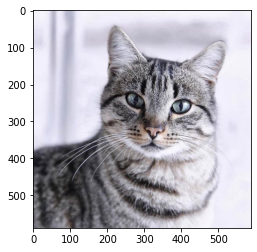

Image size: torch.Size([3, 588, 588])


In [ ]:

pil2tensor = transforms.ToTensor()
tensor2pil = transforms.ToPILImage()

image = Image.open('/content/Tabby-cat-3.jpeg')
rgb_image = pil2tensor(image)

def plot_image(tensor):
    plt.figure()
    plt.imshow(tensor.numpy().transpose(1, 2, 0))
    plt.show()

plot_image(rgb_image)

print('Image size: ' + str(rgb_image.size()))

In [ ]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)


In [ ]:

transform=transforms.Compose([
                              transforms.ToPILImage(),
                              #transforms.Resize((224,224)), 
                              transforms.ToTensor(),
                              AddGaussianNoise(0.15, 0.99)  
                           ])
x = pil2tensor (image)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


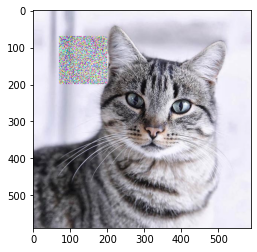

In [ ]:
x[:,70:200,70:200] = transform(x[:,70:200,70:200])

plot_image(x)

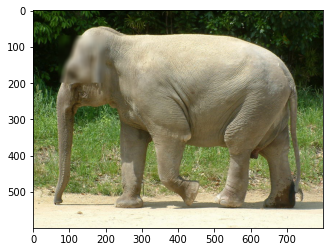

In [ ]:
# Blur
image = Image.open("/content/elephant.jpg")

transform = T.GaussianBlur(kernel_size=(17, 17), sigma=(0.1, 200))

x = pil2tensor (image)

x[:,70:200,70:200] = transform(x[:,70:200,70:200])

plot_image(x)